# Red Wine Machine Learning Model

In [1]:
# Import dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from pathlib import Path
from collections import Counter

In [2]:
path = 'Resources/RedWine_dataset.csv'
red_wine_df1 = pd.read_csv(path)
red_wine_df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [3]:
red_wine_df1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.875547,46.468418,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460434,32.895920,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [4]:
red_wine_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   int64  
 6   total sulfur dioxide  1599 non-null   int64  
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(9), int64(3)
memory usage: 150.0 KB


In [5]:
# Check for null values
red_wine_df1.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
# Sort quality values
red_wine_df1['quality'].value_counts().sort_values() 

3     10
8     18
4     53
7    199
6    638
5    681
Name: quality, dtype: int64

In [7]:
# Check value counts
for col in red_wine_df1:
    print(red_wine_df1[col].value_counts(ascending=False), '\n')

7.2     67
7.1     57
7.8     53
7.5     52
7.0     50
        ..
13.5     1
13.8     1
13.4     1
4.7      1
5.5      1
Name: fixed acidity, Length: 96, dtype: int64 

0.600    47
0.500    46
0.430    43
0.590    39
0.360    38
         ..
1.035     1
0.565     1
1.130     1
1.115     1
1.090     1
Name: volatile acidity, Length: 143, dtype: int64 

0.00    132
0.49     68
0.24     51
0.02     50
0.26     38
       ... 
0.72      1
0.62      1
0.75      1
1.00      1
0.78      1
Name: citric acid, Length: 80, dtype: int64 

2.00     156
2.20     131
1.80     129
2.10     128
1.90     117
        ... 
4.25       1
2.85       1
3.45       1
2.35       1
13.90      1
Name: residual sugar, Length: 91, dtype: int64 

0.080    66
0.074    55
0.076    51
0.078    51
0.084    49
         ..
0.108     1
0.148     1
0.143     1
0.222     1
0.230     1
Name: chlorides, Length: 153, dtype: int64 

6     139
5     104
10     79
15     78
12     75
7      71
9      62
16     61
17     60
11     59


In [8]:
# Show rows and columns of original dataset
red_wine_df1.shape

(1599, 12)

In [9]:
# Drop Duplicates
# Show rows and columns of updated dataset
red_wine=red_wine_df1.copy()
red_wine.drop_duplicates(subset=None,inplace=True)
red_wine.shape

(1359, 12)

In [10]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   int64  
 6   total sulfur dioxide  1359 non-null   int64  
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(9), int64(3)
memory usage: 138.0 KB


###### No categorical variables found in dataset // All variables are qualitative

### Correlation Heatmap

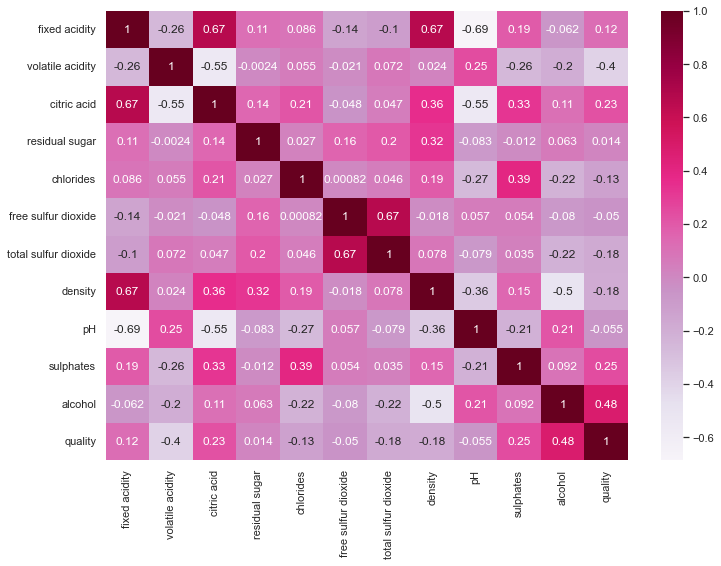

In [27]:
sns.heatmap(red_wine.corr(), annot=True,cmap='PuRd')
plt.show()

## Split the Data into Training and Testing

In [12]:
# Dividing the dataset in training and testing set
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 

np.random.seed(0)
df_train,df_test=train_test_split(red_wine,train_size=0.7,test_size=0.3,random_state=100)

In [13]:
# Create our features
X = red_wine[list(red_wine.columns)[:-1]]

# Create our target
y = red_wine['quality']

In [14]:
X.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.894040,46.826343,0.996709,3.309787,0.658705,10.432315
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447595,33.409287,0.001869,0.155036,0.170667,1.082065
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [15]:
y.describe()

count    1359.000000
mean        5.623252
std         0.823578
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

In [16]:
y.value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1, stratify=y)

In [18]:
# Training model info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 951 entries, 31 to 926
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         951 non-null    float64
 1   volatile acidity      951 non-null    float64
 2   citric acid           951 non-null    float64
 3   residual sugar        951 non-null    float64
 4   chlorides             951 non-null    float64
 5   free sulfur dioxide   951 non-null    int64  
 6   total sulfur dioxide  951 non-null    int64  
 7   density               951 non-null    float64
 8   pH                    951 non-null    float64
 9   sulphates             951 non-null    float64
 10  alcohol               951 non-null    float64
 11  quality               951 non-null    int64  
dtypes: float64(9), int64(3)
memory usage: 96.6 KB


In [19]:
# Testing model info
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 408 entries, 1573 to 677
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         408 non-null    float64
 1   volatile acidity      408 non-null    float64
 2   citric acid           408 non-null    float64
 3   residual sugar        408 non-null    float64
 4   chlorides             408 non-null    float64
 5   free sulfur dioxide   408 non-null    int64  
 6   total sulfur dioxide  408 non-null    int64  
 7   density               408 non-null    float64
 8   pH                    408 non-null    float64
 9   sulphates             408 non-null    float64
 10  alcohol               408 non-null    float64
 11  quality               408 non-null    int64  
dtypes: float64(9), int64(3)
memory usage: 41.4 KB


In [20]:
df_train.shape

(951, 12)

In [21]:
df_test.shape

(408, 12)

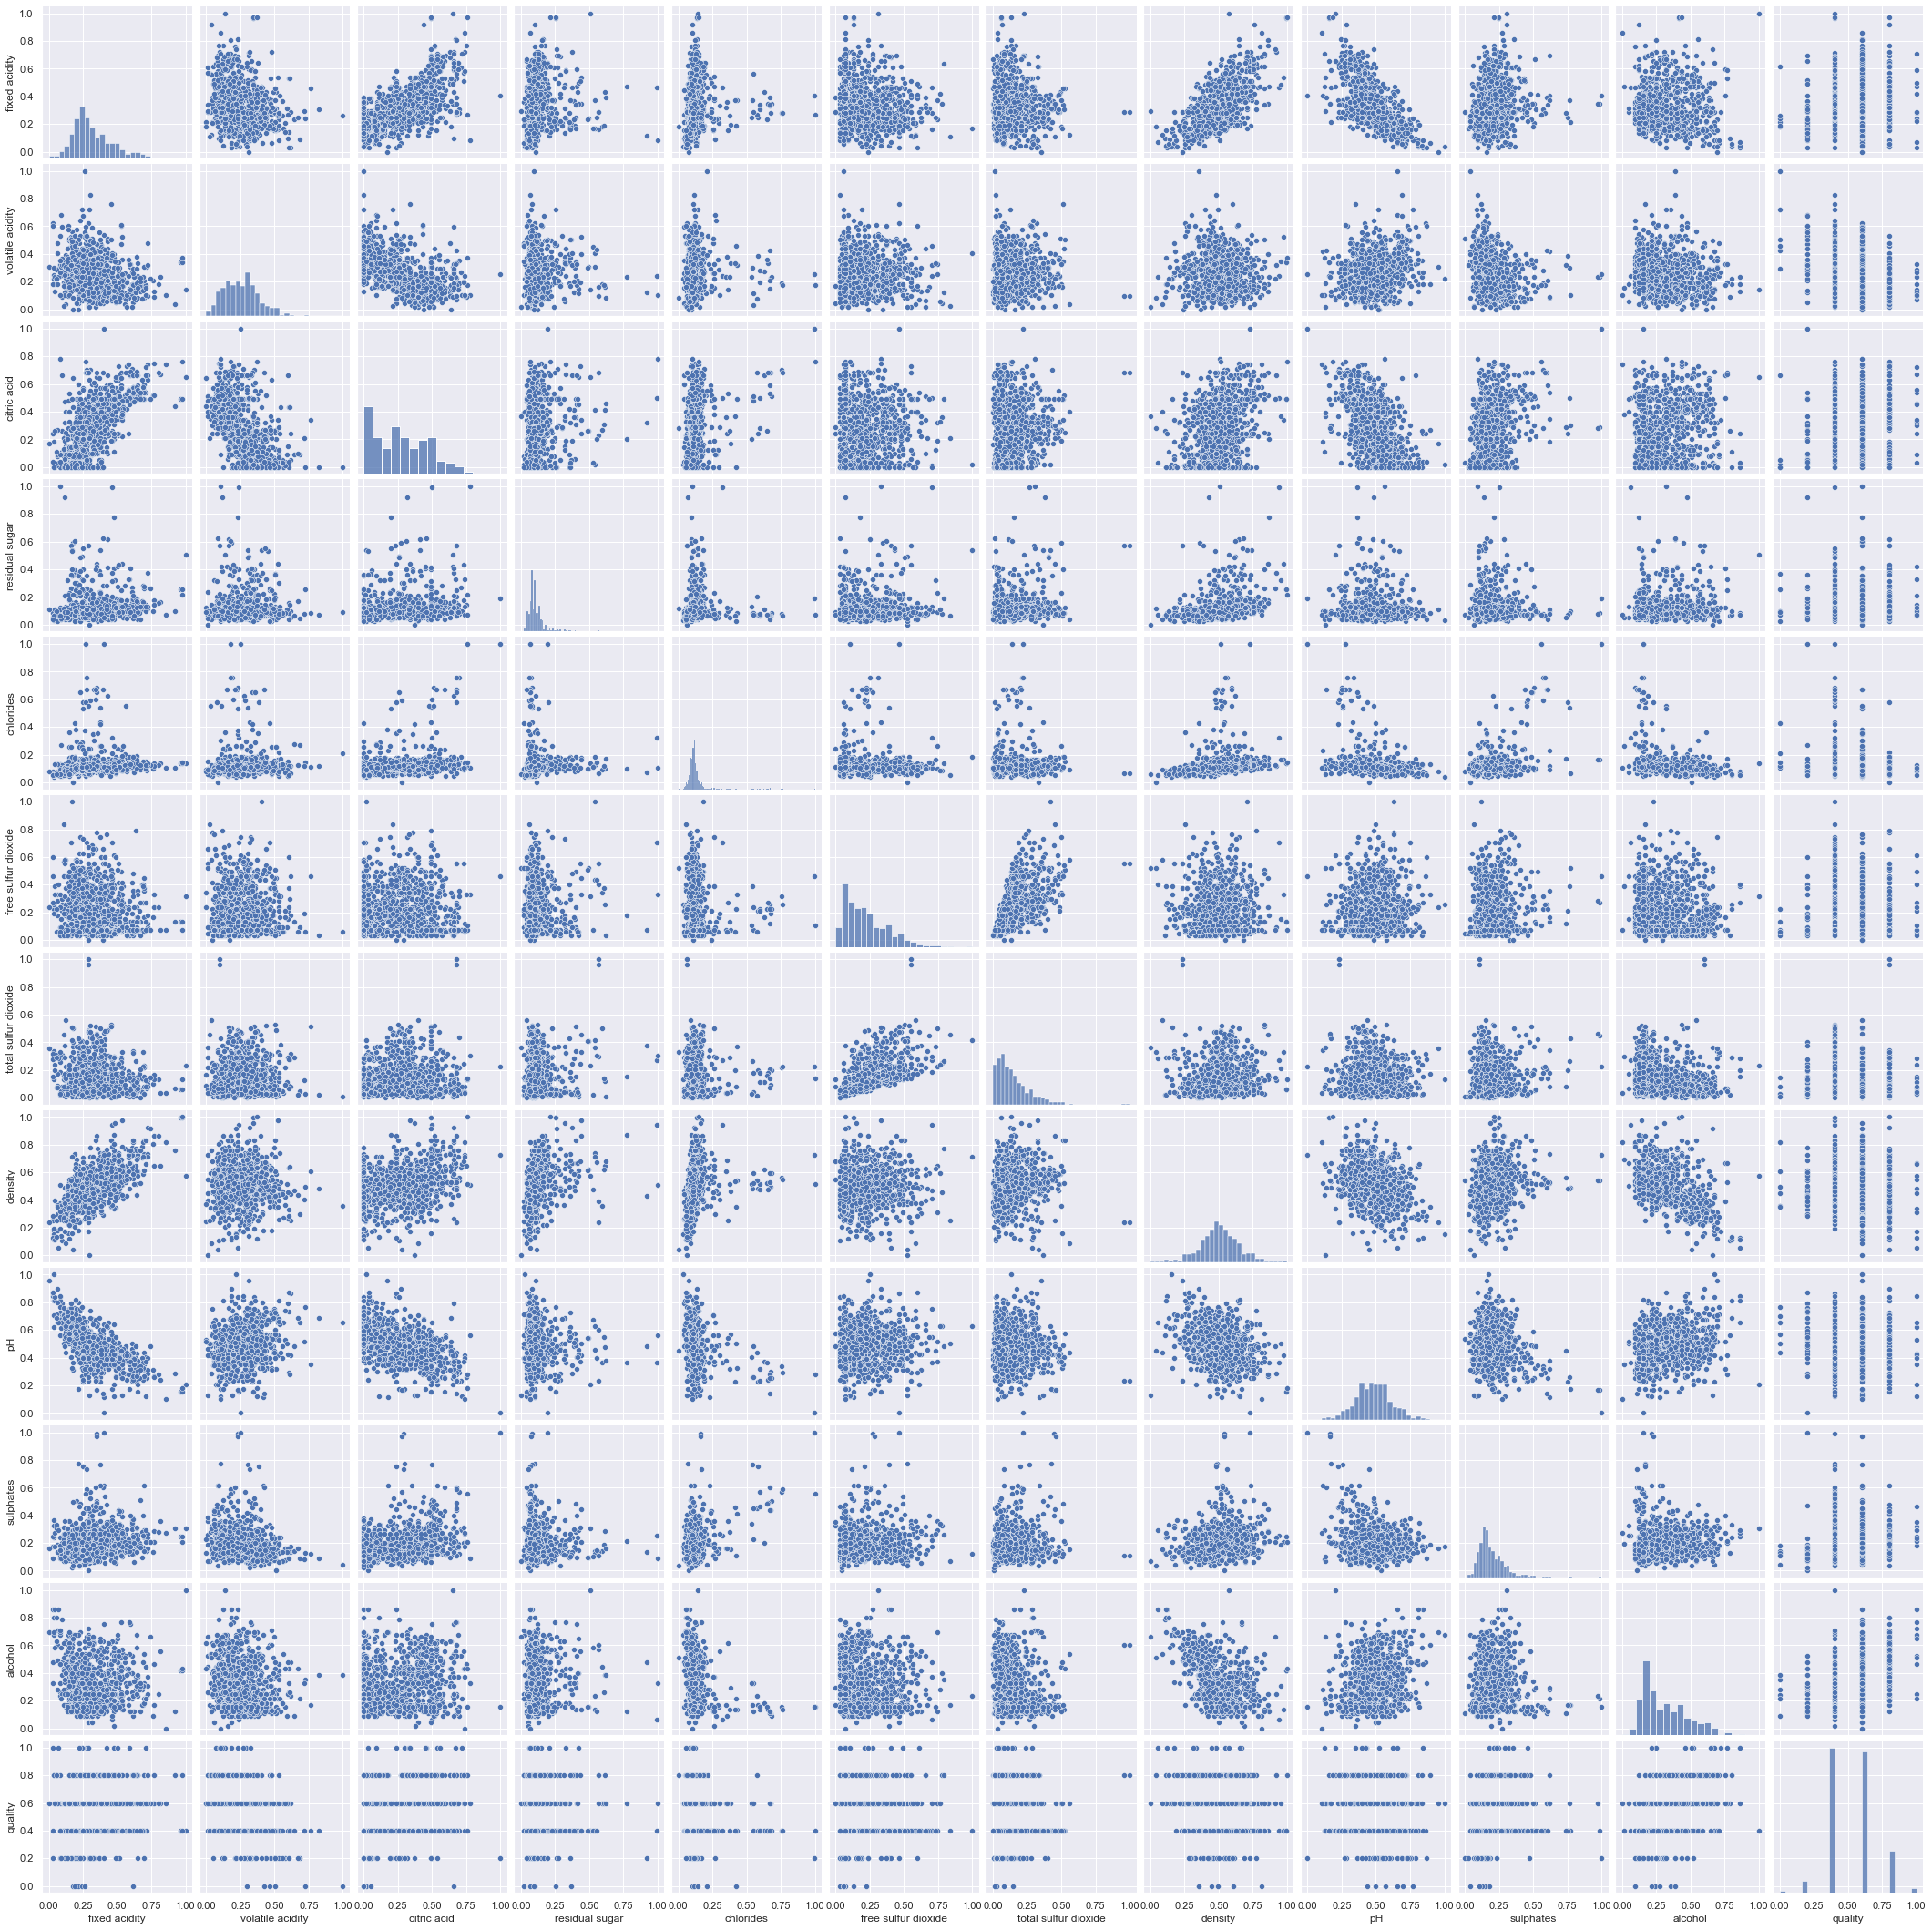

In [32]:
# Pairplot: see both distribution of single variables and relationships between two variables
sns.pairplot(df_train) 
plt.show()

## Rescaling

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
31,6.9,0.685,0.00,2.5,0.105,22,37,0.99660,3.46,0.57,10.6,6
371,7.9,0.240,0.40,1.6,0.056,11,25,0.99670,3.32,0.87,8.7,6
952,8.2,0.310,0.40,2.2,0.058,6,10,0.99536,3.31,0.68,11.2,7
1037,7.3,0.910,0.10,1.8,0.074,20,56,0.99672,3.35,0.56,9.2,5
1398,7.0,0.600,0.12,2.2,0.083,13,28,0.99660,3.52,0.62,10.2,7


In [33]:
df_train[:]=scaler.fit_transform(df_train[:])
df_train.head()

/Users/rahul/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/rahul/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/rahul/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/pandas/core/indexing.py:723: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See th

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
31,0.196429,0.369718,0.00,0.123077,0.155259,0.313433,0.109541,0.497334,0.620690,0.143713,0.338462,0.6
371,0.285714,0.056338,0.40,0.053846,0.073456,0.149254,0.067138,0.504950,0.500000,0.323353,0.046154,0.6
952,0.312500,0.105634,0.40,0.100000,0.076795,0.074627,0.014134,0.402894,0.491379,0.209581,0.430769,0.8
1037,0.232143,0.528169,0.10,0.069231,0.103506,0.283582,0.176678,0.506474,0.525862,0.137725,0.123077,0.4
1398,0.205357,0.309859,0.12,0.100000,0.118531,0.179104,0.077739,0.497334,0.672414,0.173653,0.276923,0.8


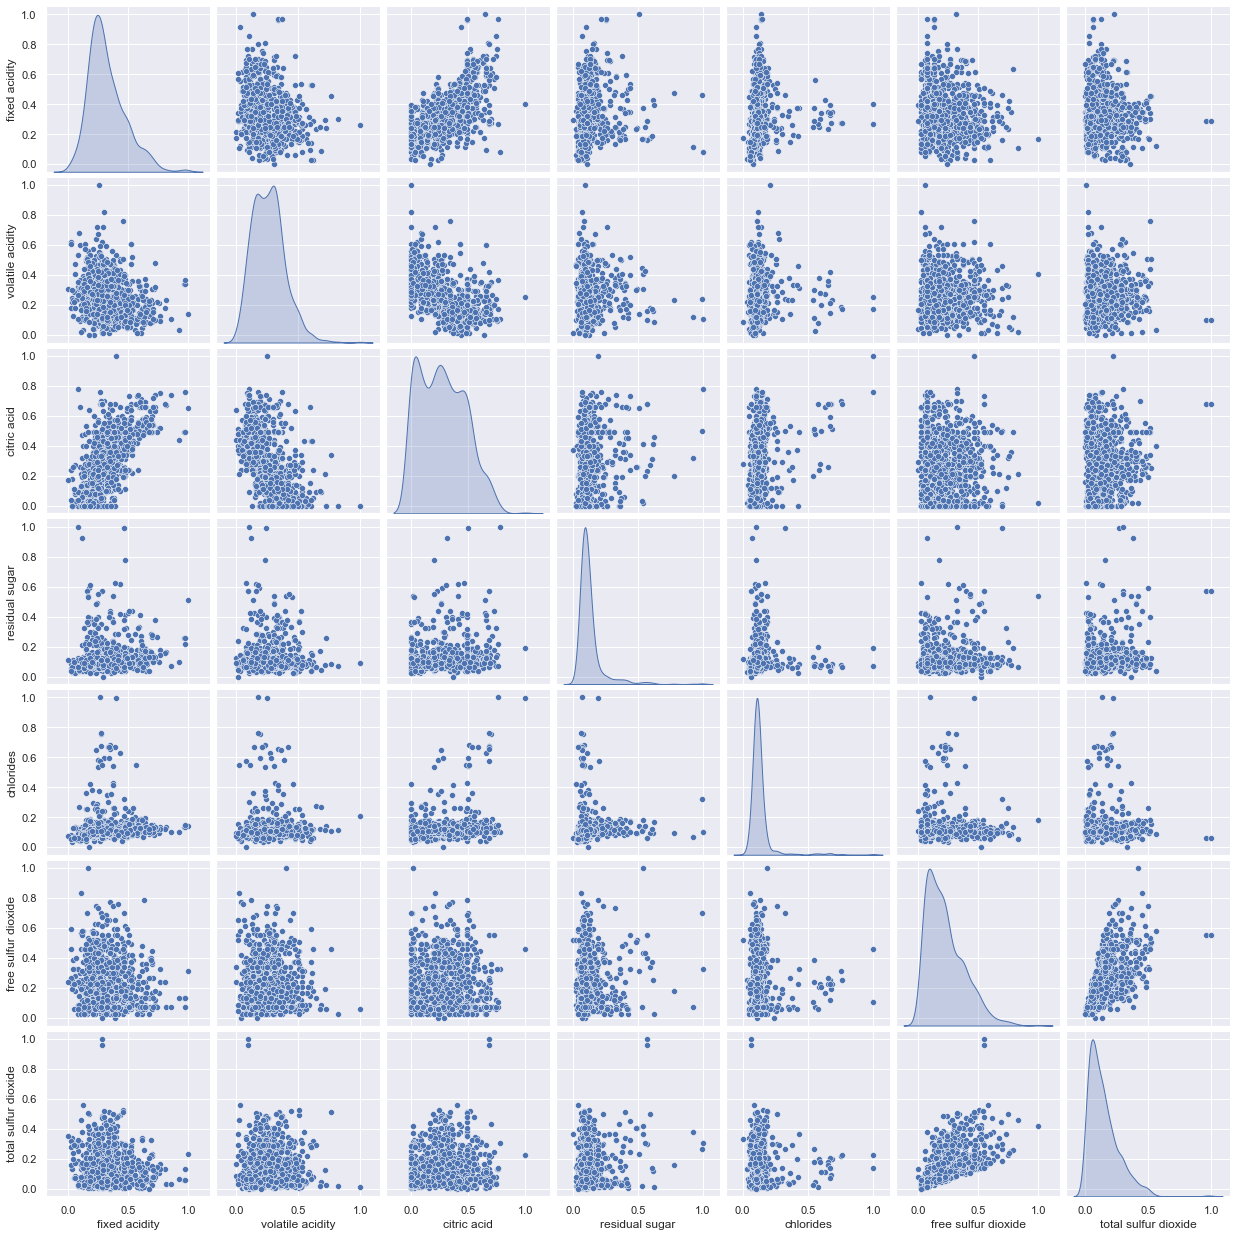

In [24]:
# Multi-Variate Analysis
sns.set(rc={'figure.figsize':(11.7,8.27)})
cData_attr = df_train.iloc[:, 0:7]
sns.pairplot(cData_attr, diag_kind='kde')   

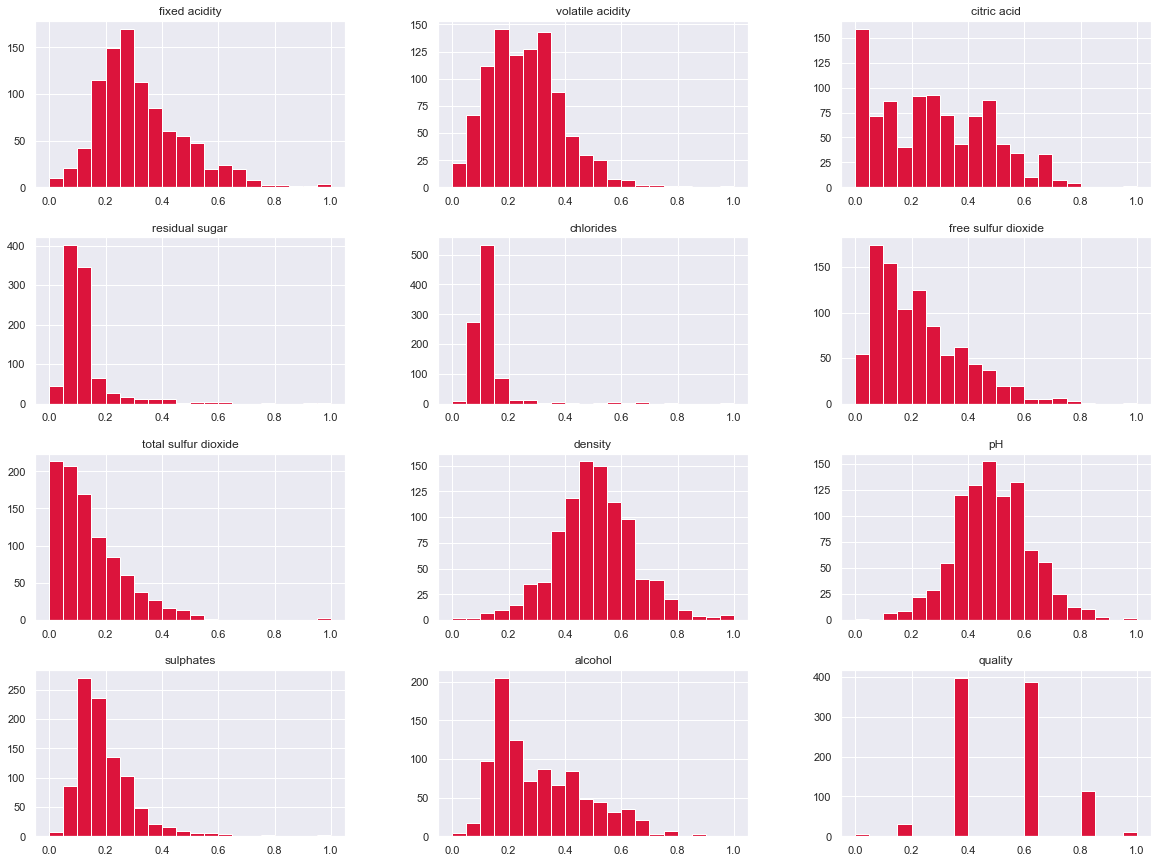

In [25]:
# Distributions of the variables / features
df_train.hist(figsize=(20,15),bins=20, color="crimson")
plt.show()

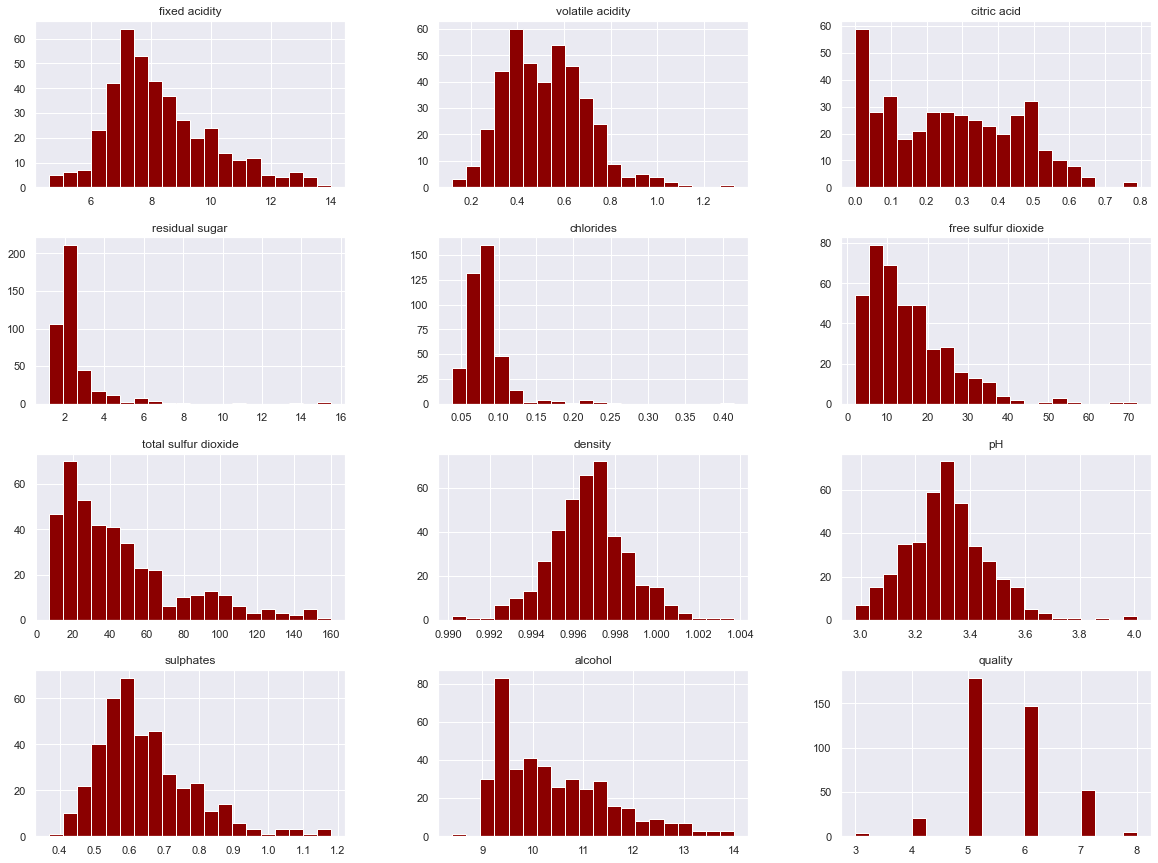

In [26]:
df_test.hist(figsize=(20,15),bins=20, color='darkred')
plt.show()